# Fire Atlas Dataset Exploration // Perimeter
#### Exploring the 2016 map with geopandas
Andrew McDonald // CSE 847 // 7 March 2021

In [1]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

# 1. Subset 2016 Perimeter Dataset to USA


In [2]:
perim = gpd.read_file("2016_wildperim_usa/Global_fire_atlas_V1_perimeter_2016.shp")
perim.head(5)

,fire_ID,lat,lon,size,perimeter,start_date,start_DOY,end_date,end_DOY,duration,expansion,fire_line,speed,direction,direction_s,landcover,landcover_s,tile_ID,geometry
0,1,20.8438,-156.412,0.86,4.63,2016-10-26,300,2016-11-02,307,8,0.11,0.23,0.37,3,east,12,Croplands,h03v06,"POLYGON ((-156.41809 20.84583, -156.40917 20.8..."
1,2,20.8396,-156.416,1.50,6.48,2016-10-28,302,2016-11-02,307,6,0.25,0.54,0.57,4,southeast,12,Croplands,h03v06,"POLYGON ((-156.42268 20.84167, -156.41822 20.8..."
2,3,20.8104,-156.435,0.43,2.78,2016-11-29,334,2016-11-29,334,1,0.43,0.93,0.46,0,none,12,Croplands,h03v06,"POLYGON ((-156.44142 20.81250, -156.43251 20.8..."
3,4,20.6271,-156.246,18.65,30.56,2016-02-16,47,2016-02-20,51,5,3.73,6.20,2.68,8,northwest,7,Open shrublands,h03v06,"POLYGON ((-156.27803 20.65000, -156.26912 20.6..."
4,5,19.8062,-155.893,7.72,12.96,2016-03-20,80,2016-03-25,85,6,1.29,2.47,1.39,4,southeast,7,Open shrublands,h03v07,"POLYGON ((-155.90819 19.80833, -155.88604 19.8..."


In [3]:
perim.shape


(887251, 19)

In [4]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
usa = world[world["iso_a3"] == "USA"]
usa

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [5]:
perim_usa = gpd.overlay(perim, usa, how="intersection")
perim_usa.head(5)

,fire_ID,lat,lon,size,perimeter,start_date,start_DOY,end_date,end_DOY,duration,...,direction_s,landcover,landcover_s,tile_ID,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,1,20.8438,-156.412,0.86,4.63,2016-10-26,300,2016-11-02,307,8,...,east,12,Croplands,h03v06,326625791,North America,United States of America,USA,18560000.0,"POLYGON ((-156.41809 20.84583, -156.40917 20.8..."
1,2,20.8396,-156.416,1.50,6.48,2016-10-28,302,2016-11-02,307,6,...,southeast,12,Croplands,h03v06,326625791,North America,United States of America,USA,18560000.0,"POLYGON ((-156.42268 20.84167, -156.41822 20.8..."
2,3,20.8104,-156.435,0.43,2.78,2016-11-29,334,2016-11-29,334,1,...,none,12,Croplands,h03v06,326625791,North America,United States of America,USA,18560000.0,"POLYGON ((-156.44142 20.81250, -156.43251 20.8..."
3,4,20.6271,-156.246,18.65,30.56,2016-02-16,47,2016-02-20,51,5,...,northwest,7,Open shrublands,h03v06,326625791,North America,United States of America,USA,18560000.0,"POLYGON ((-156.27803 20.65000, -156.26912 20.6..."
4,5,19.8062,-155.893,7.72,12.96,2016-03-20,80,2016-03-25,85,6,...,southeast,7,Open shrublands,h03v07,326625791,North America,United States of America,USA,18560000.0,"POLYGON ((-155.90819 19.80833, -155.88604 19.8..."


In [6]:
perim_usa.to_file("2016_wildperim_usa/usa_2016_perimeter.shp")

<ipython-input-6-df63063a3cb8>:1: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  perim_usa.to_file("2016_wildfires/usa_2016_perimeter.shp")


# 2. Plot USA Shapefile Data

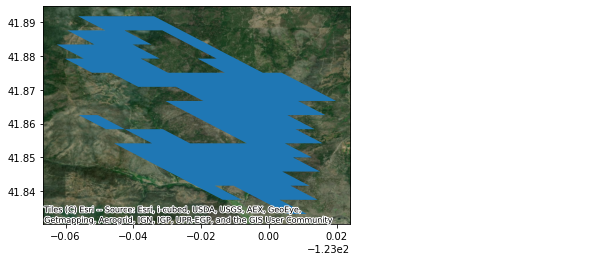

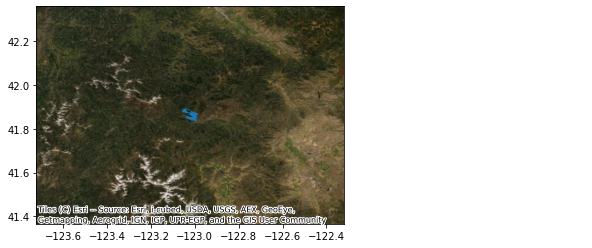

In [7]:
idx = 10
ax = perim_usa.iloc[[idx]].plot(alpha=1)
ctx.add_basemap(ax, crs=perim_usa.crs, source=ctx.providers.Esri.WorldImagery)

minx, miny, maxx, maxy = perim_usa.iloc[[idx]].bounds.T.values
perim_usa.iloc[[idx]].bounds

padx, pady = (maxx - minx)*8, (maxy - miny)*8
ax = perim_usa.iloc[[idx]].plot(alpha=1)
ax.set_xlim(minx-padx, maxx+padx)
ax.set_ylim(miny-pady, maxy+pady)
ctx.add_basemap(ax, crs=perim_usa.crs, source=ctx.providers.Esri.WorldImagery)
